Step 1: Loading the Data
Shape of original dataset: (2611367, 19)

Year-wise data count:
Year
2002.0         1
2003.0    123477
2004.0    124390
2005.0    132465
2006.0    134531
2007.0    142063
2008.0    149374
2009.0    146932
2010.0    142117
2011.0    132525
2012.0    131142
2013.0    126472
2014.0    117642
2015.0    113211
2016.0    109387
2017.0    106181
2018.0     99564
2019.0    104147
2020.0     99679
2021.0     92257
2022.0     88501
2023.0     88597
2024.0     87167
2025.0     19544
Name: count, dtype: int64


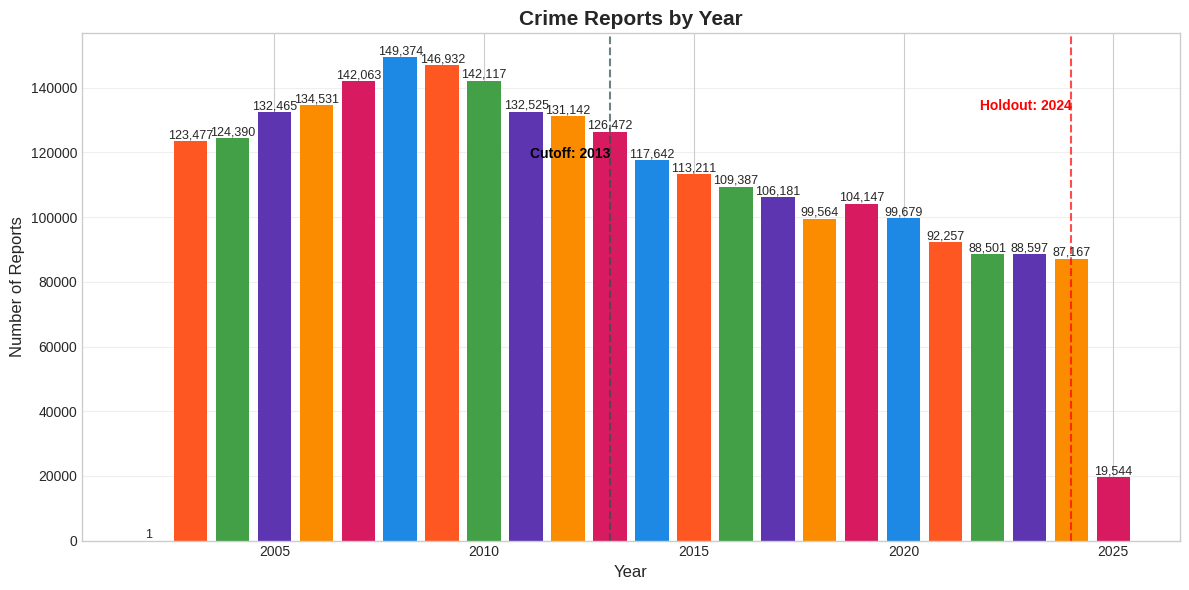


Keeping data from 2013 to 2024
After filtering: 1232805 rows


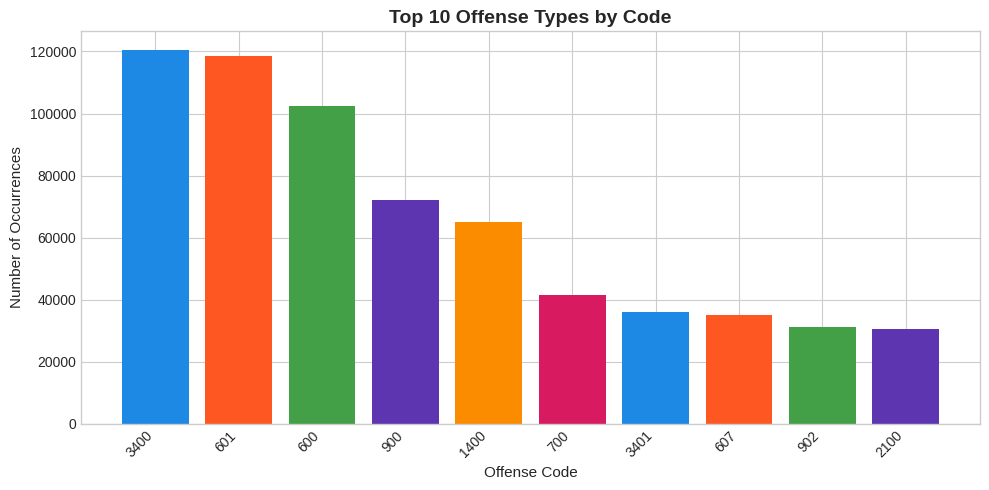


DATA CLEANING AND PREPROCESSING
Dropped 9 unnecessary columns
Removed 88 rows with wrong report dates
Removed 138536 rows with missing clearance dates
Removed 159215 rows with wrong clearance dates
Final cleaned data shape: (934966, 11)

CALCULATING TARGET VARIABLE AND SPLITTING DATA


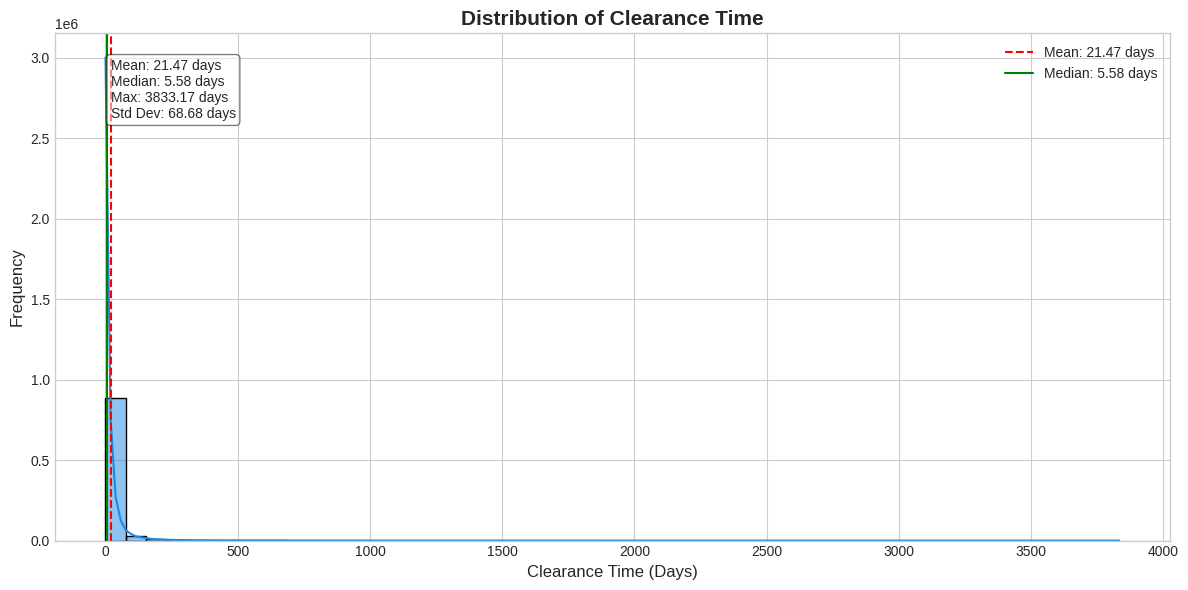

Removed 155129 rows with clearance time greater than 30 days


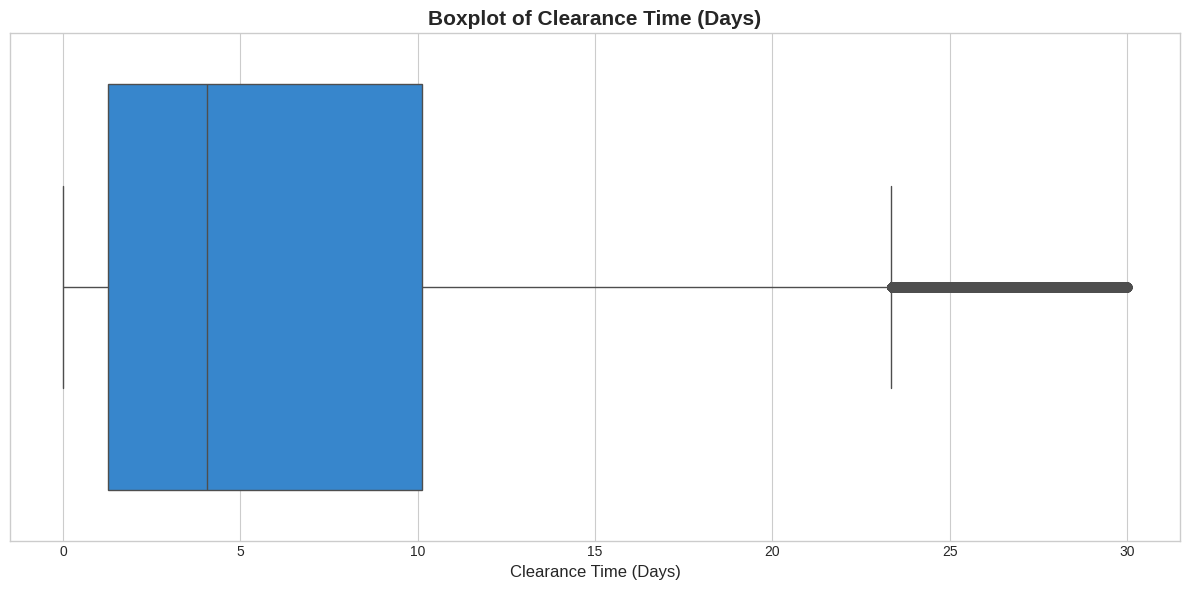


CONVERTING TO CLASSIFICATION PROBLEM

Created 3 clearance categories:
Clearance Category
Slow      265135
Medium    257347
Fast      257147
Name: count, dtype: int64


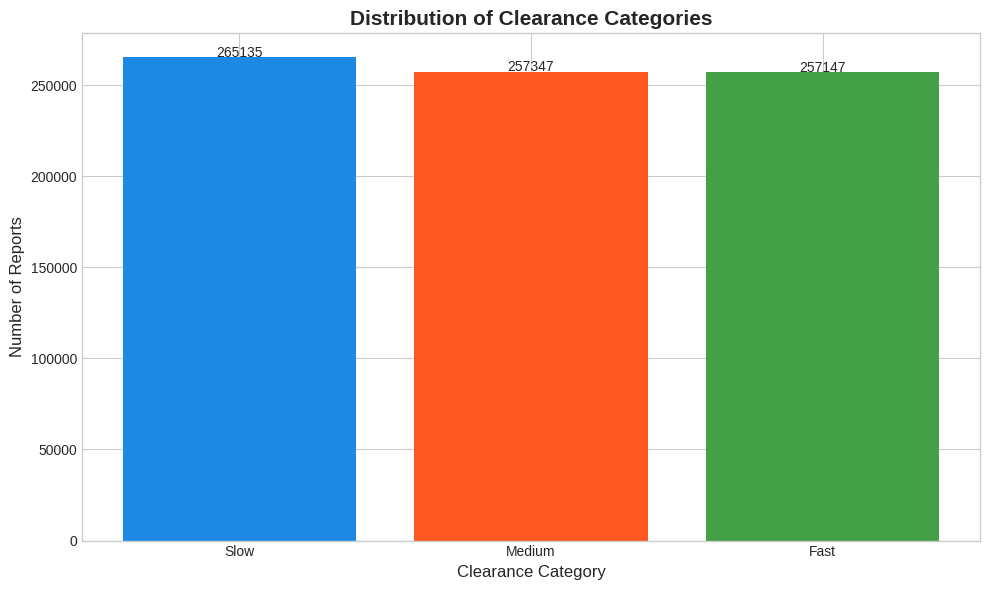

Training data: 725529 rows, Holdout data: 54100 rows

FEATURE ENGINEERING - NO TARGET LEAKAGE
Engineered training data shape: (725529, 28)
Engineered holdout data shape: (54100, 28)


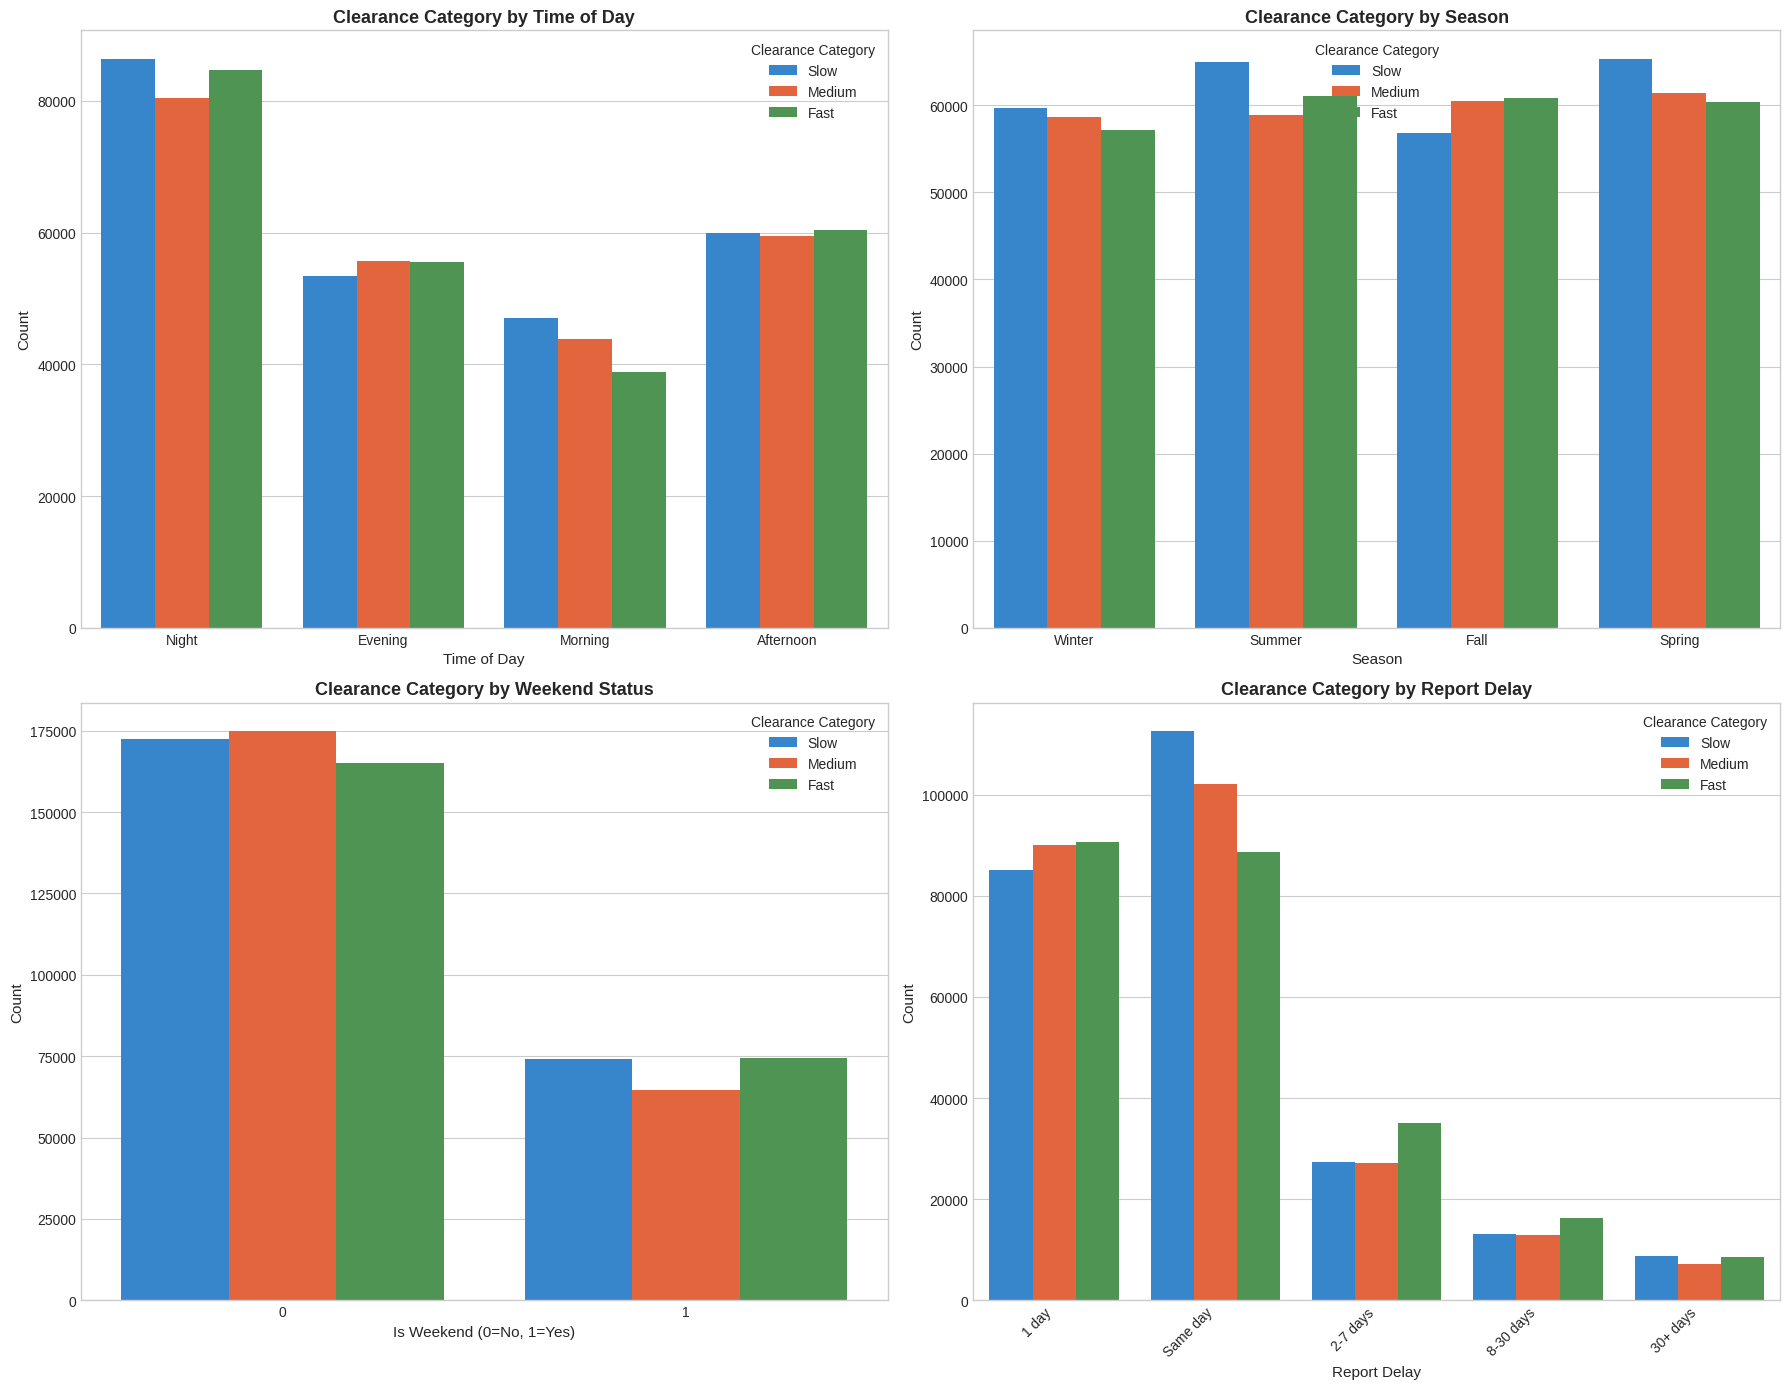


PREPARING DATA FOR MODELING


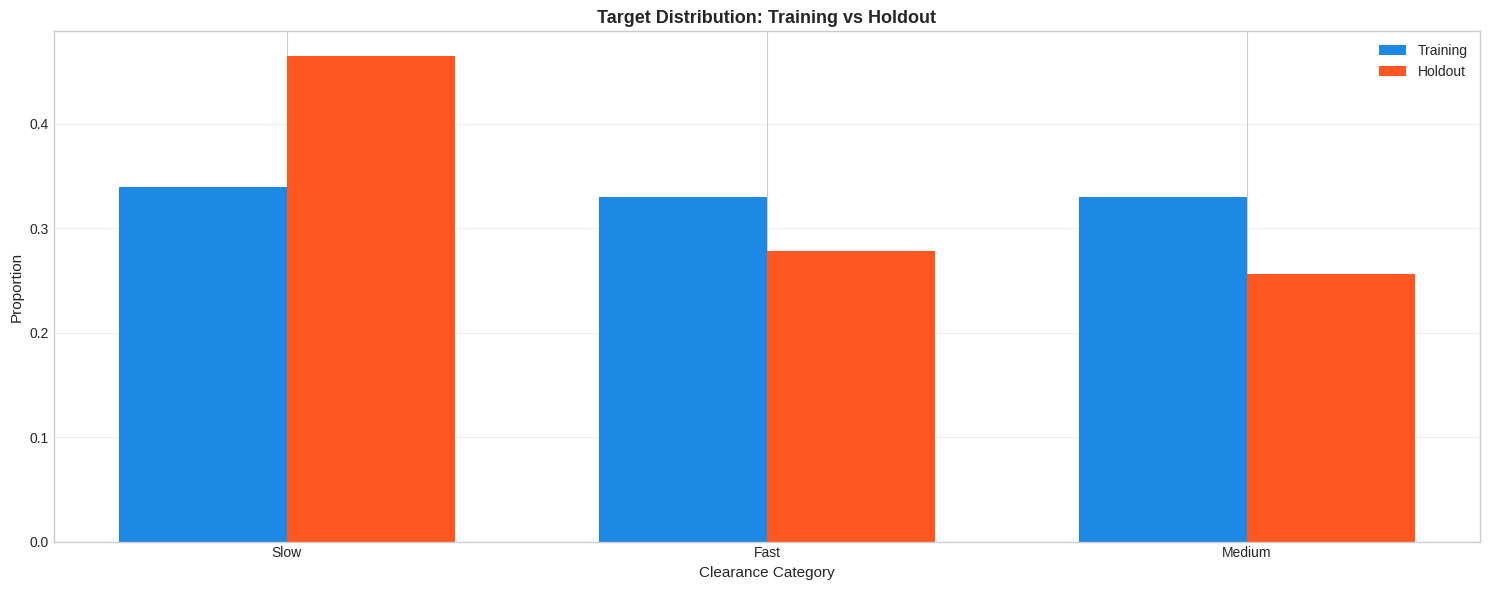

Final training data: 725529 rows, 21 columns
Final holdout data: 54100 rows, 21 columns

CREATING PREPROCESSING PIPELINE WITHOUT DATA LEAKAGE
Identifying column types for preprocessing...
High-cardinality columns for frequency encoding: ['Highest Offense Code', 'Location Type', 'Council District', 'APD Sector', 'APD District']
Low-cardinality columns for one-hot encoding: ['Family Violence', 'Occurred Time Of Day', 'Occurred Season', 'Report Delay Bin']
Numeric columns for scaling: ['Report Delay Hours', 'Report Delay Days', 'Occurred Month', 'Occurred Day', 'Occurred Hour', 'Occurred DayOfWeek', 'Report Month', 'Report Day', 'Report Hour', 'Report DayOfWeek', 'Occurred Is Weekend', 'Report Is Weekend']
Unique encoded labels: [0 1 2]
Class names: ['Fast' 'Medium' 'Slow']

Training and evaluating Naive Bayes...
Taking 5.0% random sample of training data...
Sampled training data: 36276 rows (from 725529 original rows)


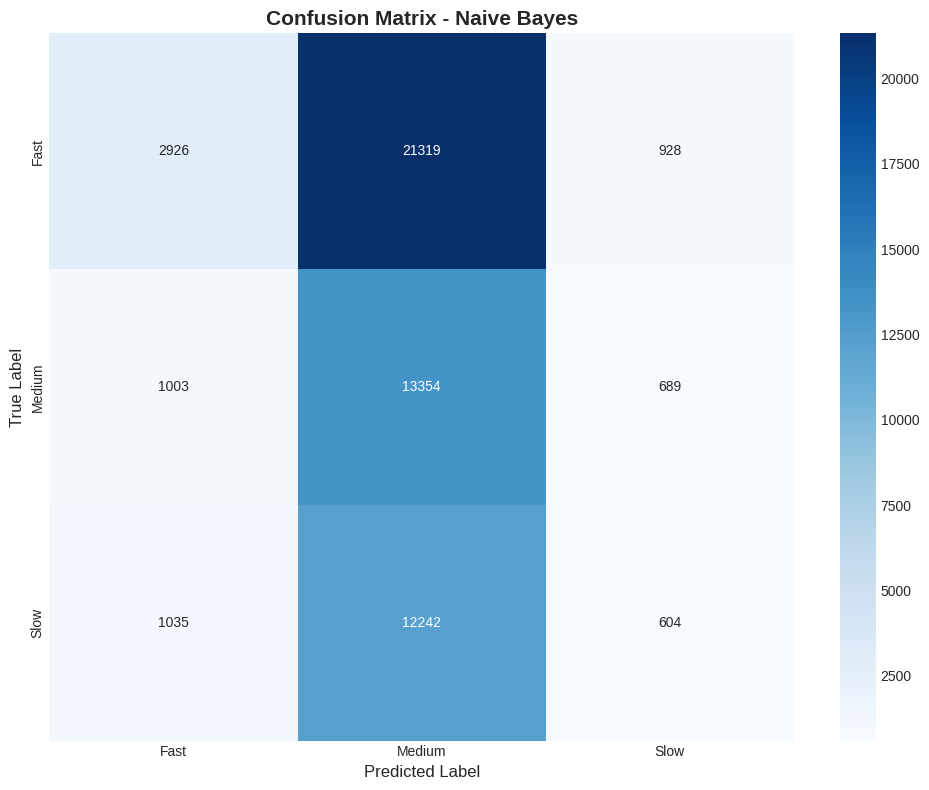

Finished in 1.72 seconds
Best parameters: {}
Cross-validation Accuracy: 0.3488
Holdout Accuracy: 0.3121
Holdout F1 Score: 0.2295

Classification Report:
              precision    recall  f1-score   support

        Fast       0.59      0.12      0.19     25173
      Medium       0.28      0.89      0.43     15046
        Slow       0.27      0.04      0.08     13881

    accuracy                           0.31     54100
   macro avg       0.38      0.35      0.23     54100
weighted avg       0.42      0.31      0.23     54100


Training and evaluating Random Forest...
Taking 5.0% random sample of training data...
Sampled training data: 36276 rows (from 725529 original rows)
Fitting 5 folds for each of 8 candidates, totalling 40 fits


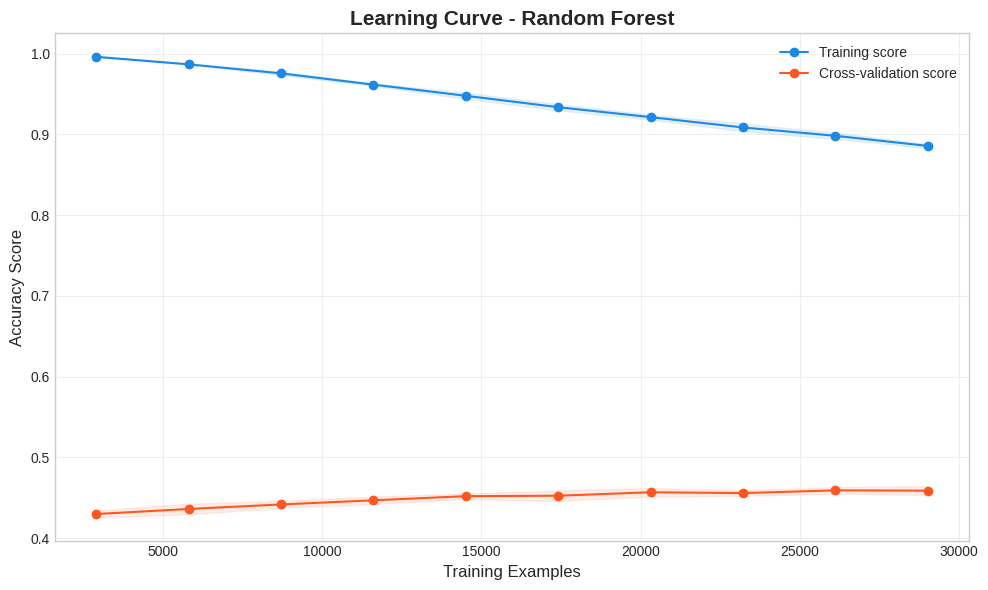

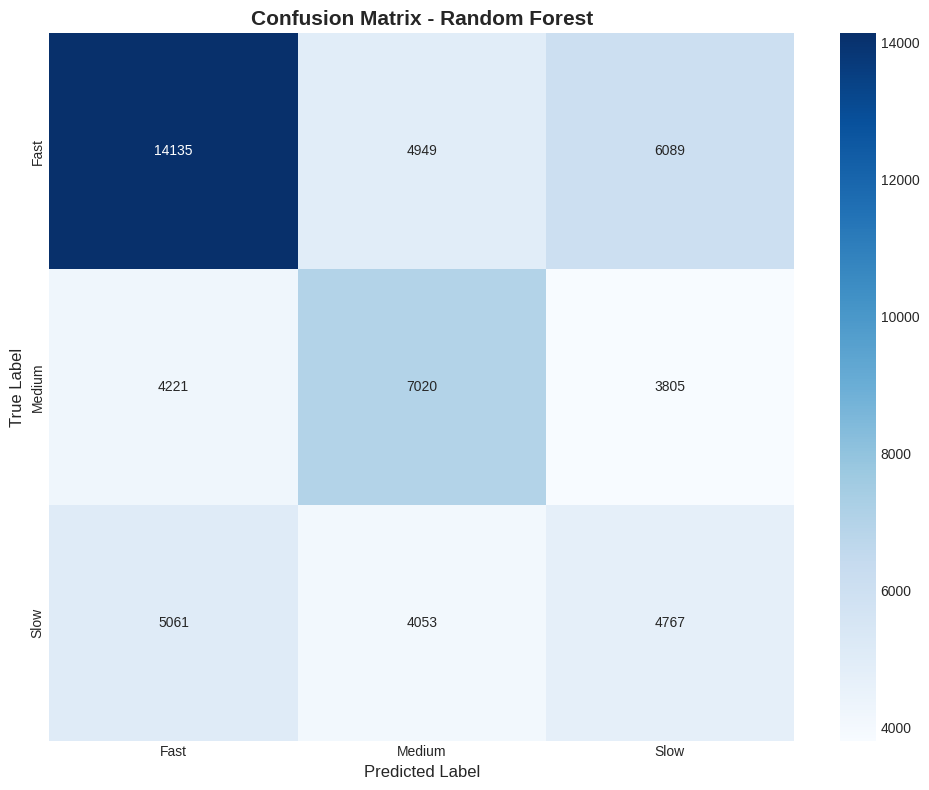

Finished in 236.27 seconds
Best parameters: {'estimator__max_depth': 15, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 200}
Cross-validation Accuracy: 0.4608
Holdout Accuracy: 0.4791
Holdout F1 Score: 0.4821

Classification Report:
              precision    recall  f1-score   support

        Fast       0.60      0.56      0.58     25173
      Medium       0.44      0.47      0.45     15046
        Slow       0.33      0.34      0.33     13881

    accuracy                           0.48     54100
   macro avg       0.46      0.46      0.46     54100
weighted avg       0.49      0.48      0.48     54100



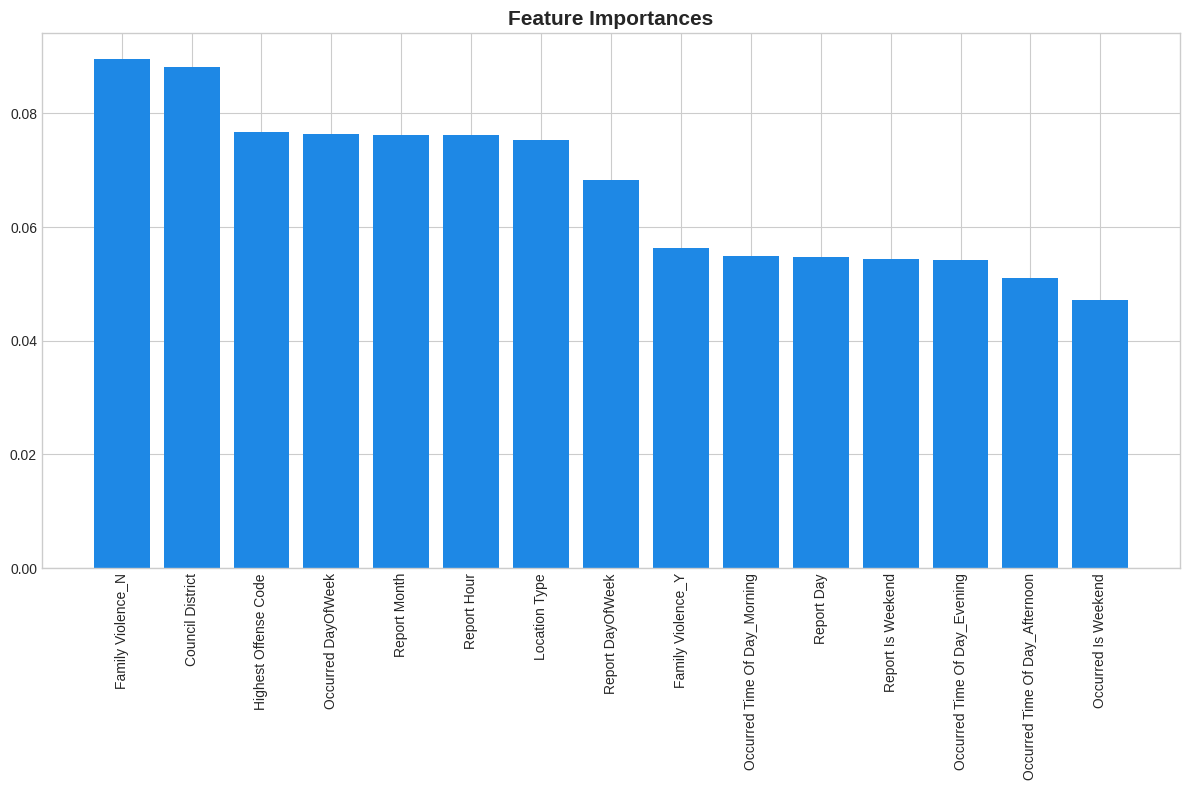


Top 10 most important features:
1. Family Violence_N: 0.0896
2. Council District: 0.0882
3. Highest Offense Code: 0.0767
4. Occurred DayOfWeek: 0.0764
5. Report Month: 0.0763
6. Report Hour: 0.0762
7. Location Type: 0.0753
8. Report DayOfWeek: 0.0684
9. Family Violence_Y: 0.0564
10. Occurred Time Of Day_Morning: 0.0550

Training and evaluating KNN...
Taking 5.0% random sample of training data...
Sampled training data: 36276 rows (from 725529 original rows)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


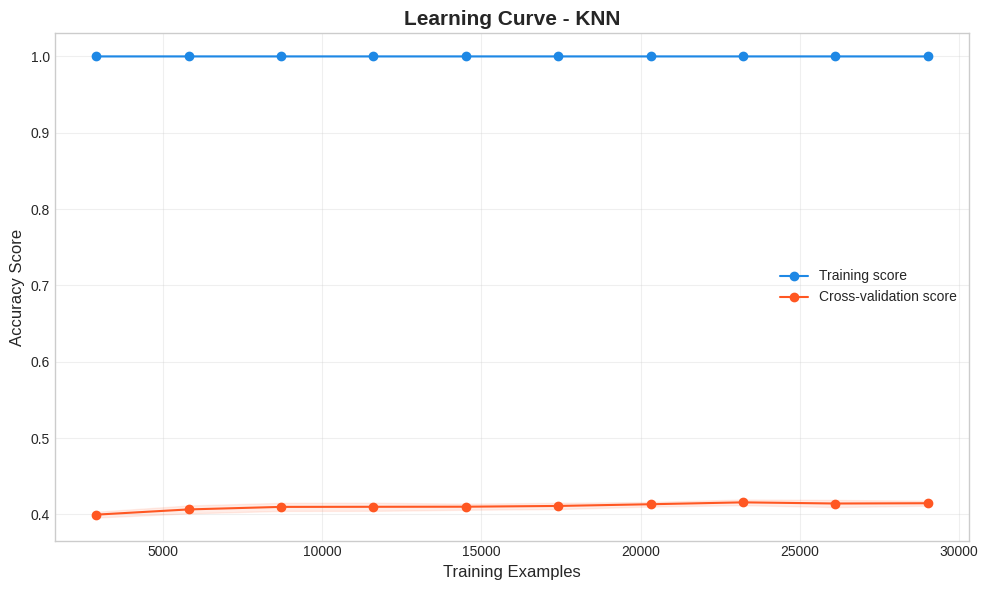

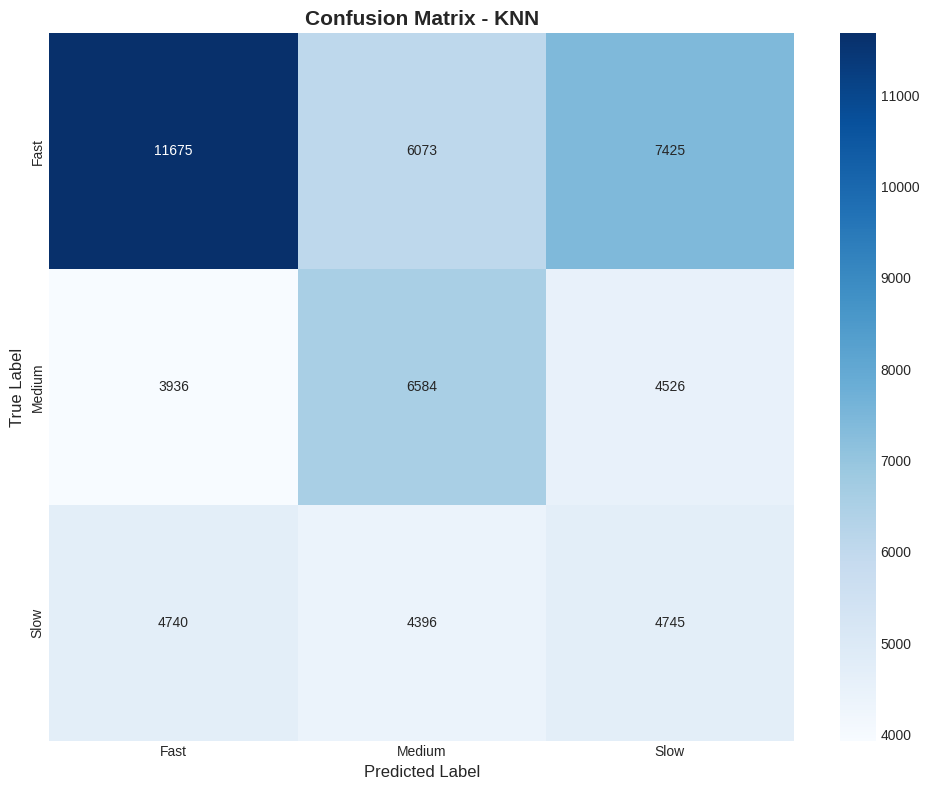

Finished in 267.11 seconds
Best parameters: {'estimator__metric': 'euclidean', 'estimator__n_neighbors': 21, 'estimator__weights': 'distance'}
Cross-validation Accuracy: 0.4174
Holdout Accuracy: 0.4252
Holdout F1 Score: 0.4324

Classification Report:
              precision    recall  f1-score   support

        Fast       0.57      0.46      0.51     25173
      Medium       0.39      0.44      0.41     15046
        Slow       0.28      0.34      0.31     13881

    accuracy                           0.43     54100
   macro avg       0.41      0.41      0.41     54100
weighted avg       0.45      0.43      0.43     54100


Training and evaluating Neural Network...
Taking 5.0% random sample of training data...
Sampled training data: 36276 rows (from 725529 original rows)
Fitting 5 folds for each of 18 candidates, totalling 90 fits


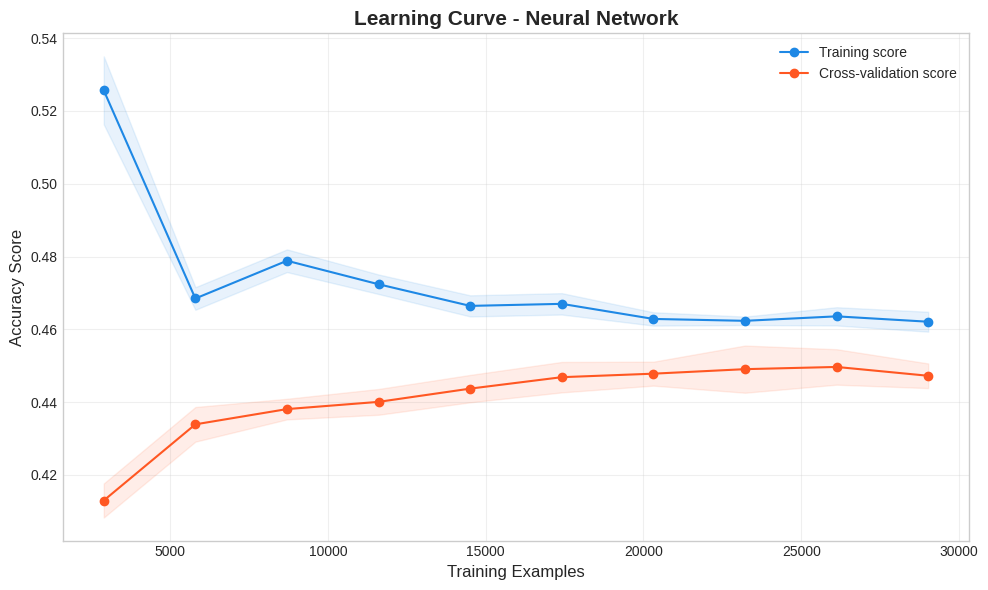

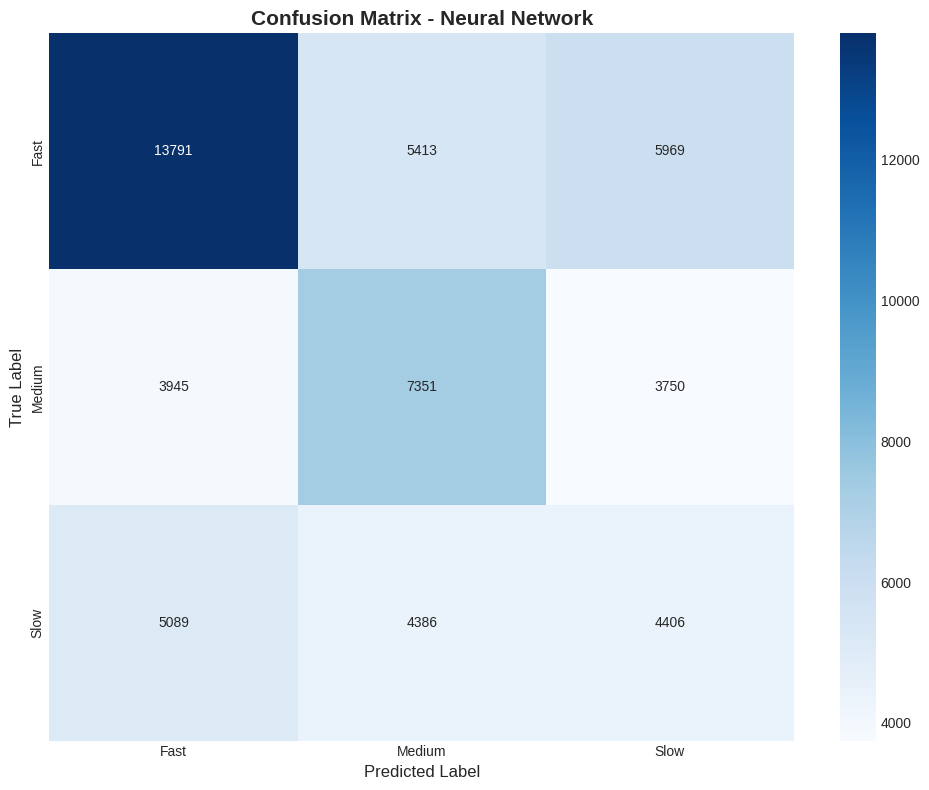

Finished in 716.36 seconds
Best parameters: {'estimator__activation': 'relu', 'estimator__alpha': 0.01, 'estimator__hidden_layer_sizes': (50,)}
Cross-validation Accuracy: 0.4498
Holdout Accuracy: 0.4722
Holdout F1 Score: 0.4751

Classification Report:
              precision    recall  f1-score   support

        Fast       0.60      0.55      0.57     25173
      Medium       0.43      0.49      0.46     15046
        Slow       0.31      0.32      0.31     13881

    accuracy                           0.47     54100
   macro avg       0.45      0.45      0.45     54100
weighted avg       0.48      0.47      0.48     54100



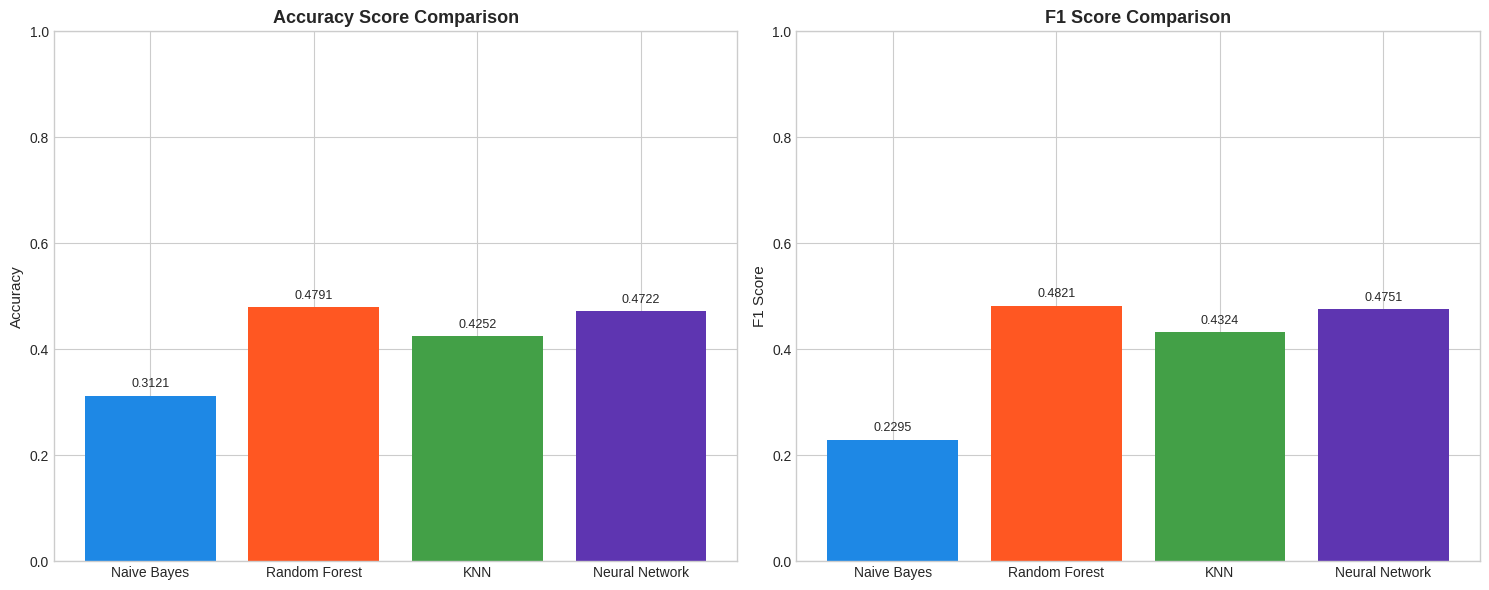

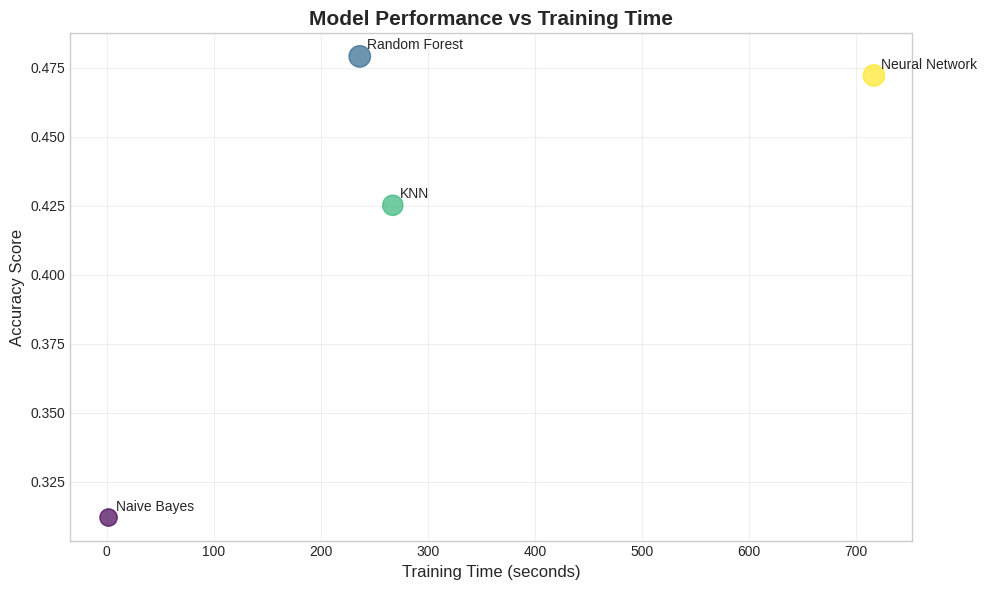


Best model: Random Forest

=== CONCLUSION ===
The best performing model is Random Forest with an accuracy of 0.4791
This model achieved an F1 score of 0.4821 on the holdout set

Model training and evaluation complete!


In [1]:
# -*- coding: utf-8 -*-

# Austin Crime Data Classification - Final Project
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, learning_curve, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
import time
import warnings
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from scipy import stats
warnings.filterwarnings('ignore')
# Import necessary classes
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# Set up plotting styles for consistent visualizations
plt.style.use('seaborn-v0_8-whitegrid')
custom_colors = ["#1e88e5", "#ff5722", "#43a047", "#5e35b1", "#fb8c00", "#d81b60"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

# Step 1: Load the data
print("Step 1: Loading the Data")

data = pd.read_csv("Final.csv")
print(f"Shape of original dataset: {data.shape}")

# Extract year from 'Report Date Time'
data['temp_date'] = pd.to_datetime(data['Report Date Time'], errors='coerce')
data['Year'] = data['temp_date'].dt.year

# Show year distribution
print("\nYear-wise data count:")
year_counts = data['Year'].value_counts().sort_index()
print(year_counts)

# Visualize year distribution
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(year_counts.index, year_counts.values, color=custom_colors)
ax.set_title('Crime Reports by Year', fontsize=15, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Reports', fontsize=12)
ax.grid(axis='y', alpha=0.3)
# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,}', ha='center', va='bottom', fontsize=9)

# Highlight cutoff year
cutoff_year = 2013  # Start from 2013 as requested
holdout_year = 2024 # Use 2024 as holdout as requested
ax.axvline(x=cutoff_year, color='darkslategray', linestyle='--', alpha=0.7)
ax.text(cutoff_year, max(year_counts)*0.8, f'Cutoff: {cutoff_year}', color='black', fontweight='bold', ha='right', va='center')
ax.axvline(x=holdout_year, color='red', linestyle='--', alpha=0.7)
ax.text(holdout_year, max(year_counts)*0.9, f'Holdout: {holdout_year}', color='red', fontweight='bold', ha='right', va='center')
plt.tight_layout()
plt.show()

# Filter data to include only years from cutoff to present
before_rows = len(data)
data = data[(data['Year'] >= cutoff_year) & (data['Year'] <= holdout_year)]
after_rows = len(data)
print(f"\nKeeping data from {cutoff_year} to {holdout_year}")
print(f"After filtering: {after_rows} rows")

# Clean temporary columns
data.drop(columns=['temp_date'], inplace=True)

# Explore offense type distribution
if 'Highest Offense Code' in data.columns:
    top_offenses = data['Highest Offense Code'].value_counts().head(10)
    fig, ax = plt.subplots(figsize=(10, 5))
    offense_codes_str = top_offenses.index.astype(str)
    ax.bar(offense_codes_str, top_offenses.values, color=custom_colors)
    ax.set_title('Top 10 Offense Types by Code', fontsize=14, fontweight='bold')
    ax.set_xlabel('Offense Code', fontsize=11)
    ax.set_ylabel('Number of Occurrences', fontsize=11)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

# Step 2: Data Cleaning and Preprocessing
print("\nDATA CLEANING AND PREPROCESSING")

# Make a copy so we don't spoil the original
df = data.copy()

# Record starting dimensions
original_rows = len(df)
original_cols = len(df.columns)

# Drop columns that we don't need for analysis
columns_to_remove = ['Incident Number', 'Occurred Date', 'Occurred Time', 'Report Date',
                     'Report Time', 'Highest Offense Description', 'UCR Category',
                     'Category Description', 'Census Block Group']

df.drop(columns=[col for col in columns_to_remove if col in df.columns], inplace=True)
print(f"Dropped {len(columns_to_remove)} unnecessary columns")

# Convert these to datetime
for col in ['Occurred Date Time', 'Report Date Time', 'Clearance Date']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Turn object columns into category to save memory
cat_cols = ['Highest Offense Code', 'Family Violence', 'Location Type',
            'Council District', 'APD Sector', 'APD District']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Remove rows where report date is before the incident
if 'Report Date Time' in df.columns and 'Occurred Date Time' in df.columns:
    bad_report = df['Report Date Time'] < df['Occurred Date Time']
    removed_bad_report = bad_report.sum()
    print(f"Removed {removed_bad_report} rows with wrong report dates")
    df = df[~bad_report]

# Remove rows that don't have clearance date info
if 'Clearance Date' in df.columns:
    missing_clear = df['Clearance Date'].isnull()
    removed_missing_clear = missing_clear.sum()
    print(f"Removed {removed_missing_clear} rows with missing clearance dates")
    df = df[~missing_clear]

# Drop rows where clearance happened before the incident or report
if all(col in df.columns for col in ['Clearance Date', 'Occurred Date Time', 'Report Date Time']):
    wrong_clear = (df['Clearance Date'] < df['Occurred Date Time']) | (df['Clearance Date'] < df['Report Date Time'])
    removed_wrong_clear = wrong_clear.sum()
    print(f"Removed {removed_wrong_clear} rows with wrong clearance dates")
    df = df[~wrong_clear]

# Final shape after all cleaning
final_rows = len(df)
final_cols = len(df.columns)
print(f"Final cleaned data shape: {df.shape}")

# Step 3: Calculate target variable (Clearance Time) and split data
print("\nCALCULATING TARGET VARIABLE AND SPLITTING DATA")

# Calculate clearance time in days
if all(col in df.columns for col in ['Clearance Date', 'Report Date Time']):
    df['Clearance Time Days'] = (df['Clearance Date'] - df['Report Date Time']).dt.total_seconds() / (24 * 3600)

# Visualize the target variable distribution
fig, ax = plt.subplots(figsize=(12, 6))

# Create histogram with KDE
sns.histplot(df['Clearance Time Days'], bins=50, kde=True, ax=ax, color=custom_colors[0])
# Add vertical lines for statistics
mean_val = df['Clearance Time Days'].mean()
median_val = df['Clearance Time Days'].median()
ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f} days')
ax.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f} days')
# Add text box with statistics
stats_text = f"Mean: {mean_val:.2f} days\nMedian: {median_val:.2f} days\nMax: {df['Clearance Time Days'].max():.2f} days\nStd Dev: {df['Clearance Time Days'].std():.2f} days"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
ax.set_title('Distribution of Clearance Time', fontsize=15, fontweight='bold')
ax.set_xlabel('Clearance Time (Days)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

# Filter out extreme outliers (e.g., greater than 30 days)
df_filtered = df[df['Clearance Time Days'] <= 30]
print(f"Removed {len(df) - len(df_filtered)} rows with clearance time greater than 30 days")
df = df_filtered

# Create box plot to show outliers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df['Clearance Time Days'], ax=ax, color=custom_colors[0])
ax.set_title('Boxplot of Clearance Time (Days)', fontsize=15, fontweight='bold')
ax.set_xlabel('Clearance Time (Days)', fontsize=12)
plt.tight_layout()
plt.show()

# Convert to classification problem by creating categories
print("\nCONVERTING TO CLASSIFICATION PROBLEM")

# Define the bins for classification based on percentiles for more balanced classes
percentile_33 = df['Clearance Time Days'].quantile(0.33)
percentile_66 = df['Clearance Time Days'].quantile(0.66)
bins = [0, percentile_33, percentile_66, float('inf')]
labels = ['Fast', 'Medium', 'Slow']

# Use pd.cut to create categories and ensure no NaN values
df['Clearance Category'] = pd.cut(df['Clearance Time Days'], bins=bins, labels=labels)

# Check for any NaN values in the target
nan_count = df['Clearance Category'].isna().sum()
if nan_count > 0:
    print(f"Warning: Found {nan_count} NaN values in categorized target. Dropping these records...")
    df = df.dropna(subset=['Clearance Category'])

print(f"\nCreated {len(labels)} clearance categories:")
print(df['Clearance Category'].value_counts())

# Visualize the distribution of categories
plt.figure(figsize=(10, 6))
cat_counts = df['Clearance Category'].value_counts()
plt.bar(cat_counts.index, cat_counts.values, color=custom_colors[:len(cat_counts)])
plt.title('Distribution of Clearance Categories', fontsize=15, fontweight='bold')
plt.xlabel('Clearance Category', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)
# Add data labels
for i, v in enumerate(cat_counts.values):
    plt.text(i, v + 100, f'{v}', ha='center')
plt.tight_layout()
plt.show()

# Split into training and holdout sets by year
train_df = df[df['Year'] < holdout_year].copy()
holdout_df = df[df['Year'] == holdout_year].copy()

# 1) Compute cut‐points on train only
p33 = train_df['Clearance Time Days'].quantile(0.33)
p66 = train_df['Clearance Time Days'].quantile(0.66)
bins = [0, p33, p66, np.inf]
labels = ['Fast','Medium','Slow']

# 2) Apply those same cuts to both sets
train_df['Clearance Category']   = pd.cut(train_df['Clearance Time Days'], bins=bins, labels=labels)
holdout_df['Clearance Category'] = pd.cut(holdout_df['Clearance Time Days'], bins=bins, labels=labels)


print(f"Training data: {len(train_df)} rows, Holdout data: {len(holdout_df)} rows")

# Step 4: Feature Engineering (separately for train and holdout) WITHOUT using target information
print("\nFEATURE ENGINEERING - NO TARGET LEAKAGE")

def engineer_features(df):
    """
    Engineer features for the dataset without using any target information
    """
    result_df = df.copy()

    # Convert categorical columns to string to avoid issues
    for col in result_df.select_dtypes(include=['category']).columns:
        result_df[col] = result_df[col].astype(str)

    # Calculate report delay metrics - these are available at prediction time
    result_df['Report Delay Hours'] = (result_df['Report Date Time'] - result_df['Occurred Date Time']).dt.total_seconds() / 3600
    result_df['Report Delay Days'] = result_df['Report Delay Hours'] / 24

    # Extract date components - these are available at prediction time
    result_df['Occurred Month'] = result_df['Occurred Date Time'].dt.month
    result_df['Occurred Day'] = result_df['Occurred Date Time'].dt.day
    result_df['Occurred Hour'] = result_df['Occurred Date Time'].dt.hour
    result_df['Occurred DayOfWeek'] = result_df['Occurred Date Time'].dt.dayofweek
    result_df['Report Month'] = result_df['Report Date Time'].dt.month
    result_df['Report Day'] = result_df['Report Date Time'].dt.day
    result_df['Report Hour'] = result_df['Report Date Time'].dt.hour
    result_df['Report DayOfWeek'] = result_df['Report Date Time'].dt.dayofweek

    # Boolean calculations - these are available at prediction time
    result_df['Occurred Is Weekend'] = result_df['Occurred DayOfWeek'].isin([5, 6]).astype(np.int8)
    result_df['Report Is Weekend'] = result_df['Report DayOfWeek'].isin([5, 6]).astype(np.int8)

    # Time of day mapping - these are available at prediction time
    time_of_day_mapping = {
        **{h: 'Morning' for h in range(5, 12)},
        **{h: 'Afternoon' for h in range(12, 17)},
        **{h: 'Evening' for h in range(17, 21)},
        **{h: 'Night' for h in list(range(0, 5)) + list(range(21, 24))}
    }

    # Season mapping - these are available at prediction time
    season_mapping = {
        **{m: 'Winter' for m in [12, 1, 2]},
        **{m: 'Spring' for m in [3, 4, 5]},
        **{m: 'Summer' for m in [6, 7, 8]},
        **{m: 'Fall' for m in [9, 10, 11]}
    }

    # Apply mappings - these are available at prediction time
    result_df['Occurred Time Of Day'] = result_df['Occurred Hour'].map(time_of_day_mapping)
    result_df['Occurred Season'] = result_df['Occurred Month'].map(season_mapping)

    # Categorize report delays into bins - these are available at prediction time
    bins = [-1, 0, 1, 7, 30, float('inf')]
    labels = ['Same day', '1 day', '2-7 days', '8-30 days', '30+ days']
    result_df['Report Delay Bin'] = pd.cut(result_df['Report Delay Days'], bins=bins, labels=labels)
    result_df['Report Delay Bin'] = result_df['Report Delay Bin'].astype(str)

    # REMOVED: We do NOT add target-derived features like Location Median Clear Time,
    # District Median Clear Time, Offense Median Clear Time, Delay Bin Median Clear Time
    # as these would cause data leakage

    return result_df

# Apply feature engineering to train and holdout separately
train_df_engineered = engineer_features(train_df)
holdout_df_engineered = engineer_features(holdout_df)

print(f"Engineered training data shape: {train_df_engineered.shape}")
print(f"Engineered holdout data shape: {holdout_df_engineered.shape}")

# Visualize relationships between features and target
# Plot clearance category by time of day, season, and weekend
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# By Time of Day
sns.countplot(x='Occurred Time Of Day', hue='Clearance Category', data=train_df_engineered,
           ax=axes[0, 0], palette=custom_colors[:3])
axes[0, 0].set_title('Clearance Category by Time of Day', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Time of Day', fontsize=11)
axes[0, 0].set_ylabel('Count', fontsize=11)
axes[0, 0].legend(title='Clearance Category')

# By Season
sns.countplot(x='Occurred Season', hue='Clearance Category', data=train_df_engineered,
           ax=axes[0, 1], palette=custom_colors[:3])
axes[0, 1].set_title('Clearance Category by Season', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Season', fontsize=11)
axes[0, 1].set_ylabel('Count', fontsize=11)
axes[0, 1].legend(title='Clearance Category')

# By Weekend vs. Weekday
sns.countplot(x='Occurred Is Weekend', hue='Clearance Category', data=train_df_engineered,
           ax=axes[1, 0], palette=custom_colors[:3])
axes[1, 0].set_title('Clearance Category by Weekend Status', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Is Weekend (0=No, 1=Yes)', fontsize=11)
axes[1, 0].set_ylabel('Count', fontsize=11)
axes[1, 0].legend(title='Clearance Category')

# By Report Delay Bin
sns.countplot(x='Report Delay Bin', hue='Clearance Category', data=train_df_engineered,
           ax=axes[1, 1], palette=custom_colors[:3])
axes[1, 1].set_title('Clearance Category by Report Delay', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Report Delay', fontsize=11)
axes[1, 1].set_ylabel('Count', fontsize=11)
axes[1, 1].legend(title='Clearance Category')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Step 5: Prepare data for modeling
print("\nPREPARING DATA FOR MODELING")

# Drop date columns and other unnecessary columns
drop_columns = ['Occurred Date Time', 'Report Date Time', 'Clearance Date',
                'Clearance Time Days', 'Year','Clearance Status','Clearance Time Days',
                'Clearance Category','Clearance Status','Clearance Date']
drop_columns = [col for col in drop_columns if col in train_df_engineered.columns]

# Separate features and target
X_train = train_df_engineered.drop(columns=drop_columns + ['Clearance Category'])
y_train = train_df_engineered['Clearance Category']
X_holdout = holdout_df_engineered.drop(columns=drop_columns + ['Clearance Category'])
y_holdout = holdout_df_engineered['Clearance Category']

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_holdout_encoded = label_encoder.transform(y_holdout)

# Visualize training vs holdout target distributions
plt.figure(figsize=(15, 6))
train_counts = y_train.value_counts(normalize=True)
holdout_counts = y_holdout.value_counts(normalize=True)

index = np.arange(len(train_counts.index))
width = 0.35

plt.bar(index - width/2, train_counts.values, width, label='Training', color=custom_colors[0])
plt.bar(index + width/2, holdout_counts.values, width, label='Holdout', color=custom_colors[1])
plt.title('Target Distribution: Training vs Holdout', fontsize=13, fontweight='bold')
plt.xlabel('Clearance Category', fontsize=11)
plt.ylabel('Proportion', fontsize=11)
plt.xticks(index, train_counts.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training data: {X_train.shape[0]} rows, {X_train.shape[1]} columns")
print(f"Final holdout data: {X_holdout.shape[0]} rows, {X_holdout.shape[1]} columns")

# Step 6: Preprocessing with proper transformers in pipeline (No data leakage)
print("\nCREATING PREPROCESSING PIPELINE WITHOUT DATA LEAKAGE")

# Define custom frequency encoder to use within pipeline
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    """
    Transformer for frequency encoding categorical columns within each CV fold
    to prevent data leakage
    """
    def __init__(self, columns):
        self.columns = columns
        self.encoding_maps = {}

    def fit(self, X, y=None):
        # Convert to DataFrame with column names
        X = pd.DataFrame(X, columns=self.columns)

        # Calculate frequency encodings for each column
        for col in self.columns:
            if col in X.columns:
                self.encoding_maps[col] = X[col].value_counts(normalize=True).to_dict()
        return self

    def transform(self, X):
        # Convert to DataFrame with column names
        X = pd.DataFrame(X, columns=self.columns)
        X_encoded = X.copy()

        # Apply frequency encoding
        for col in self.columns:
            if col in self.encoding_maps:
                X_encoded[col] = X[col].map(self.encoding_maps[col]).fillna(0)

        return X_encoded.values

# Identify columns by type
print("Identifying column types for preprocessing...")

# Original columns from raw data (not pre-processed)
cat_columns = [col for col in X_train.columns
              if X_train[col].dtype == 'object' or str(X_train[col].dtype) == 'category']

# Identify high-cardinality columns (more than 10 unique values)
high_cardinality_cols = []
low_cardinality_cols = []

for col in cat_columns:
    if X_train[col].nunique() >= 10:
        high_cardinality_cols.append(col)
    else:
        low_cardinality_cols.append(col)

# Identify numeric columns
numeric_cols = [col for col in X_train.columns
                if col not in cat_columns]

print(f"High-cardinality columns for frequency encoding: {high_cardinality_cols}")
print(f"Low-cardinality columns for one-hot encoding: {low_cardinality_cols}")
print(f"Numeric columns for scaling: {numeric_cols}")

# Step 7: Model Training and Evaluation with Proper Cross-Validation
def train_evaluate_model(X_train, y_train, X_holdout, y_holdout, model_name, estimator, param_grid, class_names, sample_fraction=0.20):
    """
    Train and evaluate a model using proper cross-validation with integrated preprocessing
    to prevent data leakage
    """
    print(f"\nTraining and evaluating {model_name}...")
    start_time = time.time()

    # Sample training data to make initial training more efficient
    # Note: We keep the holdout set intact to ensure proper evaluation
    print(f"Taking {sample_fraction*100}% random sample of training data...")

    # Ensure stratified sampling to maintain class distribution
    X_sample, X_unused, y_sample, y_unused = train_test_split(
        X_train, y_train,
        train_size=sample_fraction,
        random_state=42,
        stratify=y_train
    )

    print(f"Sampled training data: {X_sample.shape[0]} rows (from {X_train.shape[0]} original rows)")

    # Create a column transformer for preprocessing
    preprocessor = ColumnTransformer([
        # Frequency encoding for high-cardinality columns
        ('freq', FrequencyEncoder(high_cardinality_cols), high_cardinality_cols),

        # One-hot encoding for low-cardinality columns
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), low_cardinality_cols),

        # Standard scaling for numeric columns
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_cols)
    ], remainder='drop')

    # Create a pipeline with preprocessing, feature selection and the estimator
    pipeline_steps = []

    # Add preprocessor
    pipeline_steps.append(('preprocessor', preprocessor))

    # Add feature selection for models except Naive Bayes
    if model_name != 'Naive Bayes':
        pipeline_steps.append(('feature_selection',
            SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                           threshold='mean')))

    # Add the estimator
    pipeline_steps.append(('estimator', estimator))

    # Create pipeline
    pipeline = Pipeline(pipeline_steps)

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Prepare parameter grid for pipeline
    pipeline_param_grid = {}
    for key, value in param_grid.items():
        pipeline_param_grid[f'estimator__{key}'] = value

    # Grid search or simple fit
    if not pipeline_param_grid:  # If empty (for Naive Bayes)
        pipeline.fit(X_sample, y_sample)
        best_model = pipeline
        cv_score = cross_val_score(pipeline, X_sample, y_sample, cv=cv, scoring='accuracy').mean()
        best_params = {}
    else:
        grid_search = GridSearchCV(pipeline, pipeline_param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_sample, y_sample)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        cv_score = grid_search.best_score_

    # Generate learning curves if not Naive Bayes (which is very fast)
    if model_name != 'Naive Bayes':
        train_sizes, train_scores, test_scores = learning_curve(
            best_model, X_sample, y_sample, cv=5,
            scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

        # Calculate and plot learning curve
        plt.figure(figsize=(10, 6))
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1, color=custom_colors[0])
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1, color=custom_colors[1])
        plt.plot(train_sizes, train_scores_mean, 'o-', color=custom_colors[0], label='Training score')
        plt.plot(train_sizes, test_scores_mean, 'o-', color=custom_colors[1], label='Cross-validation score')

        plt.title(f'Learning Curve - {model_name}', fontsize=15, fontweight='bold')
        plt.xlabel('Training Examples', fontsize=12)
        plt.ylabel('Accuracy Score', fontsize=12)
        plt.legend(loc='best', fontsize=10)
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    # Predictions on holdout set
    y_pred = best_model.predict(X_holdout)
    holdout_accuracy = accuracy_score(y_holdout, y_pred)
    holdout_f1 = f1_score(y_holdout, y_pred, average='weighted')

    # Create confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_holdout, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=class_names,
               yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=15, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()

    elapsed_time = time.time() - start_time
    print(f"Finished in {elapsed_time:.2f} seconds")
    print(f"Best parameters: {best_params}")
    print(f"Cross-validation Accuracy: {cv_score:.4f}")
    print(f"Holdout Accuracy: {holdout_accuracy:.4f}")
    print(f"Holdout F1 Score: {holdout_f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_holdout, y_pred, target_names=class_names))

    # Try to extract feature importances where available
    if hasattr(best_model, 'named_steps') and 'estimator' in best_model.named_steps:
        try:
            # For Random Forest or other models with feature_importances_
            estimator = best_model.named_steps['estimator']
            if hasattr(estimator, 'feature_importances_'):
                # Get list of feature names after transformation
                # This is more complex with preprocessors

                # Try to get list of features after transformation
                if hasattr(best_model, 'named_steps') and 'preprocessor' in best_model.named_steps:
                    preprocessor = best_model.named_steps['preprocessor']
                    # Get transformed feature names if available
                    feature_names = []

                    # Try to get feature names from OneHotEncoder
                    if hasattr(preprocessor, 'named_transformers_') and 'ohe' in preprocessor.named_transformers_:
                        try:
                            ohe = preprocessor.named_transformers_['ohe']
                            if hasattr(ohe, 'get_feature_names_out'):
                                categorical_features = ohe.get_feature_names_out(low_cardinality_cols).tolist()
                                feature_names.extend(categorical_features)
                        except:
                            pass

                    # Add numeric columns
                    feature_names.extend(numeric_cols)

                    # Add frequency encoded columns
                    feature_names.extend(high_cardinality_cols)

                    # If feature selection was used, filter the feature names
                    if 'feature_selection' in best_model.named_steps:
                        selector = best_model.named_steps['feature_selection']
                        if hasattr(selector, 'get_support'):
                            selected = selector.get_support()
                            if len(selected) <= len(feature_names):
                                feature_names = [feature_names[i] for i in range(len(selected)) if selected[i]]
                else:
                    # Fallback to index numbers if transformers make feature name extraction complex
                    feature_names = [f"Feature_{i}" for i in range(len(estimator.feature_importances_))]

                # Plot feature importances
                importances = estimator.feature_importances_
                indices = np.argsort(importances)[::-1]

                plt.figure(figsize=(12, 8))
                plt.title('Feature Importances', fontsize=15, fontweight='bold')
                plt.bar(range(min(20, len(indices))),
                        importances[indices[:20]],
                        color=custom_colors[0])
                plt.xticks(range(min(20, len(indices))),
                          [feature_names[i] if i < len(feature_names) else f"Feature_{i}"
                           for i in indices[:20]],
                          rotation=90)
                plt.tight_layout()
                plt.show()

                # Print top features
                print("\nTop 10 most important features:")
                for i in range(min(10, len(importances))):
                    feat_name = feature_names[indices[i]] if indices[i] < len(feature_names) else f"Feature_{indices[i]}"
                    print(f"{i+1}. {feat_name}: {importances[indices[i]]:.4f}")

        except Exception as e:
            print(f"Could not extract feature importances: {e}")

    return {
        'model': best_model,
        'params': best_params,
        'cv_accuracy': cv_score,
        'holdout_accuracy': holdout_accuracy,
        'holdout_f1': holdout_f1,
        'predictions': y_pred,
        'training_time': elapsed_time
    }

# Define models and parameters (same as before)
models = {
    'Naive Bayes': {
        'estimator': GaussianNB(),
        'params': {}
    },
    'Random Forest': {
        'estimator': RandomForestClassifier(n_jobs=-1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 15],
            'min_samples_split': [2, 5]
        }
    },
    'KNN': {
        'estimator': KNeighborsClassifier(n_jobs=-1),
        'params': {
            'n_neighbors': [5, 7, 9, 15, 21],
            'weights': ['distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Neural Network': {
        'estimator': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'alpha': [0.0001, 0.001, 0.01],
            'activation': ['relu', 'tanh']
        }
    }
}

# Define sample fraction for training
sample_fraction = 0.05

# Ensure unique labels are properly encoded
unique_labels = np.unique(y_train_encoded)
print(f"Unique encoded labels: {unique_labels}")
print(f"Class names: {label_encoder.classes_}")

# Train and evaluate all models (using raw X_train, not pre-processed)
results = {}
for name, config in models.items():
    results[name] = train_evaluate_model(
        X_train, y_train_encoded,  # Use the original, non-preprocessed data
        X_holdout, y_holdout_encoded,
        name, config['estimator'], config['params'],
        class_names=label_encoder.classes_,
        sample_fraction=sample_fraction
    )

# The rest of the code (result visualization) remains the same

# Model comparison visualizations
# Performance metrics comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Extract performance metrics
model_names = list(results.keys())
accuracy_scores = [results[name]['holdout_accuracy'] for name in model_names]
f1_scores = [results[name]['holdout_f1'] for name in model_names]
training_times = [results[name]['training_time'] for name in model_names]

# Accuracy Comparison
bars = axes[0].bar(model_names, accuracy_scores, color=custom_colors[:len(model_names)])
axes[0].set_title('Accuracy Score Comparison', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=11)
axes[0].set_ylim(0, 1)

# Add data labels
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# F1 Score Comparison
bars = axes[1].bar(model_names, f1_scores, color=custom_colors[:len(model_names)])
axes[1].set_title('F1 Score Comparison', fontsize=13, fontweight='bold')
axes[1].set_ylabel('F1 Score', fontsize=11)
axes[1].set_ylim(0, 1)

# Add data labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Performance vs training time
plt.figure(figsize=(10, 6))
plt.scatter(training_times, accuracy_scores, s=[score*500 for score in accuracy_scores],
           alpha=0.7, c=range(len(model_names)), cmap='viridis')

# Add labels for each point
for i, name in enumerate(model_names):
    plt.annotate(name, (training_times[i], accuracy_scores[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.title('Model Performance vs Training Time', fontsize=15, fontweight='bold')
plt.xlabel('Training Time (seconds)', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find best model based on accuracy score
best_model_name = max(results.items(), key=lambda x: x[1]['holdout_accuracy'])[0]
print(f"\nBest model: {best_model_name}")
best_model = results[best_model_name]['model']

# Additional analysis and conclusions
print("\n=== CONCLUSION ===")
print(f"The best performing model is {best_model_name} with an accuracy of {results[best_model_name]['holdout_accuracy']:.4f}")
print(f"This model achieved an F1 score of {results[best_model_name]['holdout_f1']:.4f} on the holdout set")

print("\nModel training and evaluation complete!")